**DATA UPLOAD**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv



**IMPORT LIBRARIES**



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**DATASET DEFINITION**

In [23]:
#reading the required data files
df = pd.read_csv('dataset.csv')

In [25]:
# Print the column names to see what columns are available
print(df.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')


**EXTRACTION OF INFORMATION - # OF INSTANCES, # OF FEATURES, # OF INSTANCES FROM EACH CLASS**

In [7]:
# Number of instances
num_instances = df.shape[0]

# Number of features
num_features = df.shape[1] - 1  # Subtracting the classification column

# Number of instances from each class
class_distribution = df['classification'].value_counts()

# Displaying the results
print(f"Number of instances: {num_instances}")
print(f"Number of features: {num_features}")
print(f"Number of instances from each class:\n{class_distribution}")

Number of instances: 100000
Number of features: 34
Number of instances from each class:
classification
malware    50000
benign     50000
Name: count, dtype: int64


**TESTING AND TRAINING DATA SPLIT**

In [8]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('dataset.csv')

# Features and target variable
X = df.drop(columns=['classification'])  # Features
y = df['classification']                 # Target

# Split the data while maintaining the balance of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verifying the balance in the training and testing sets
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()

train_class_distribution, test_class_distribution

(classification
 benign     40000
 malware    40000
 Name: count, dtype: int64,
 classification
 malware    10000
 benign     10000
 Name: count, dtype: int64)

**EXPLORATORY DATA ANALYSIS (EDA)**

In [6]:
# Combine X_test and y_test for easier analysis
df = pd.concat([X_test, y_test], axis=1)

In [26]:
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [27]:
df.dtypes

,0
hash,object
millisecond,int64
classification,object
state,int64
usage_counter,int64
prio,int64
static_prio,int64
normal_prio,int64
policy,int64
vm_pgoff,int64


In [28]:
df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [29]:
#Missing Values
df.isnull().sum()


,0
hash,0
millisecond,0
classification,0
state,0
usage_counter,0
prio,0
static_prio,0
normal_prio,0
policy,0
vm_pgoff,0


**UNIVARIATE ANALYSIS**

classification
malware    50000
benign     50000
Name: count, dtype: int64


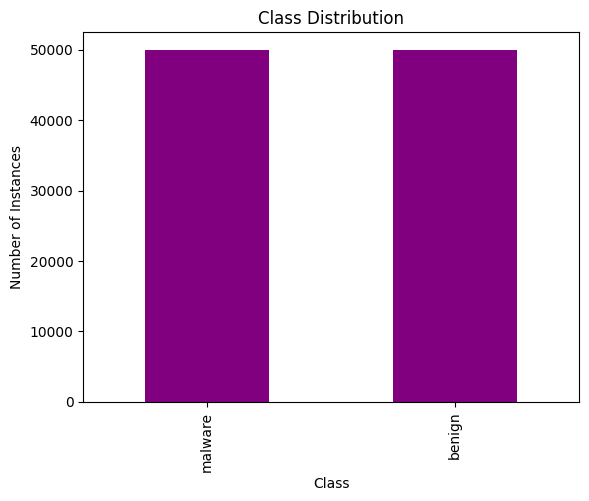

In [30]:
class_distribution = df['classification'].value_counts()
print(class_distribution)

# Plotting the class distribution
class_distribution.plot(kind='bar', title='Class Distribution', color='Purple')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()


Feature Distributions:


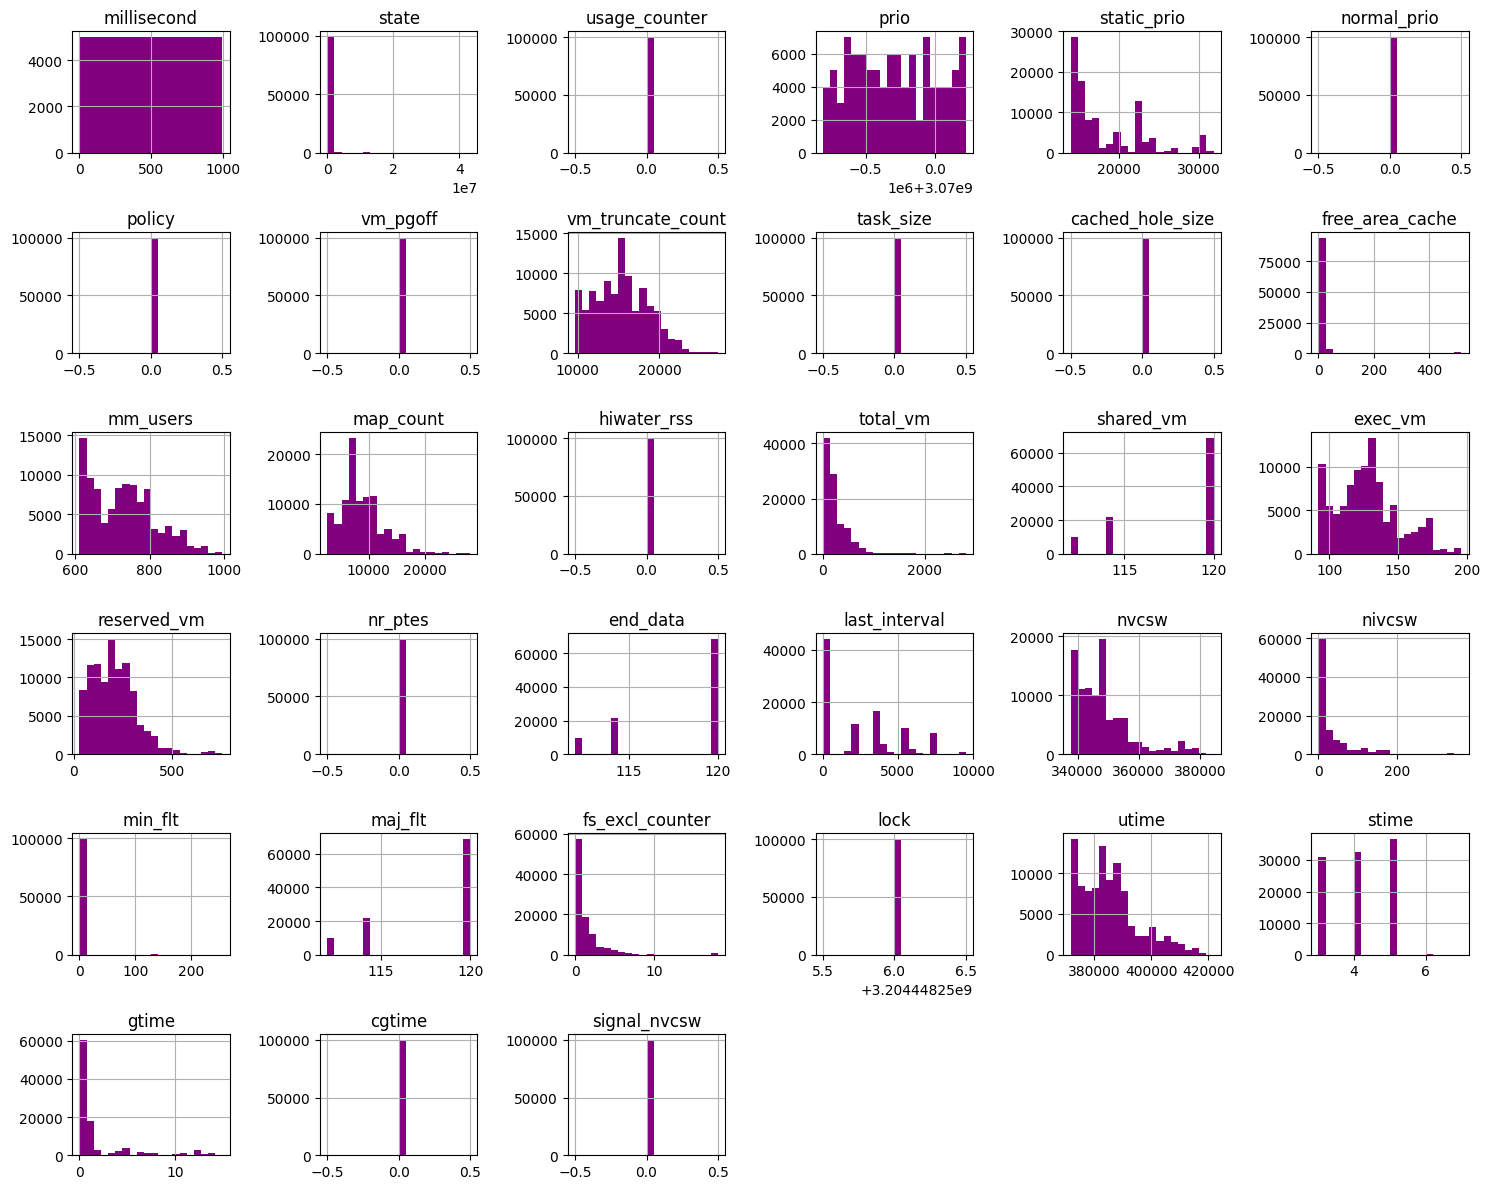

In [33]:
print("\nFeature Distributions:")
numeric_features = df.columns.tolist()

# Plotting the distribution of selected features
df.hist(figsize=(15, 12), bins=20, color='purple')
plt.tight_layout()
plt.show()


**BIVARIATE ANALYSIS**


Box Plots:


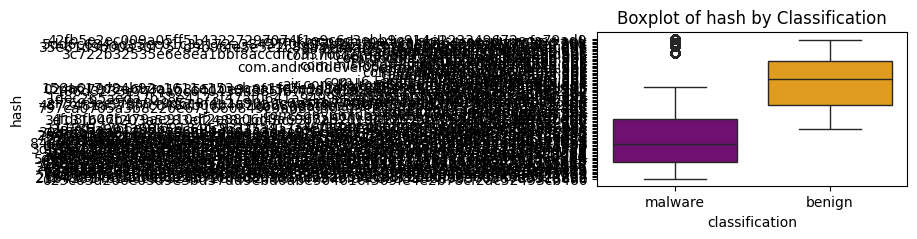

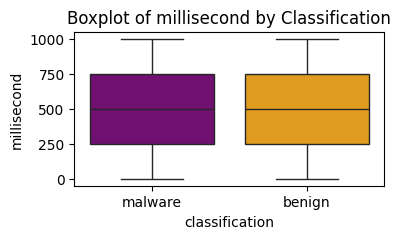

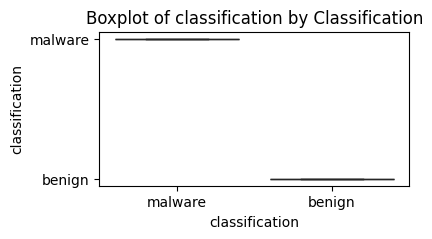

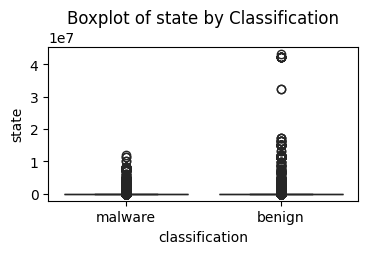

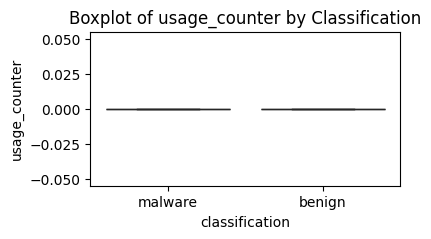

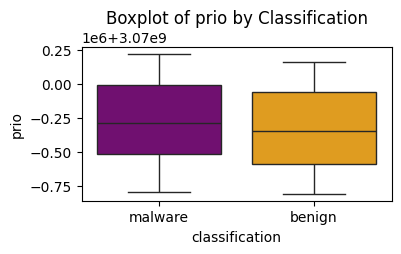

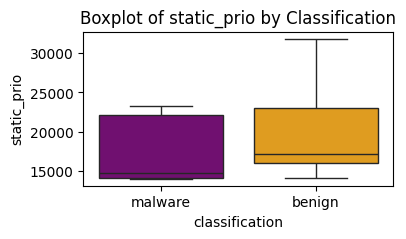

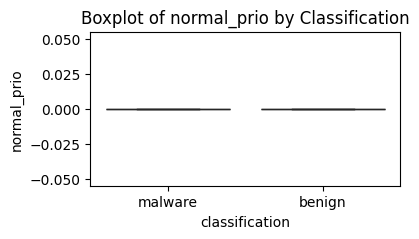

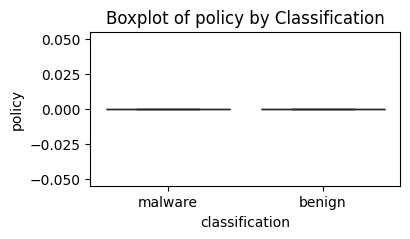

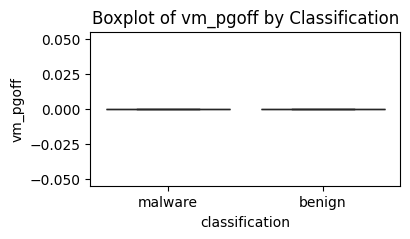

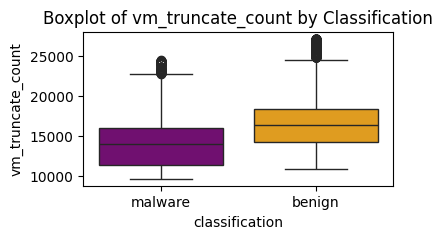

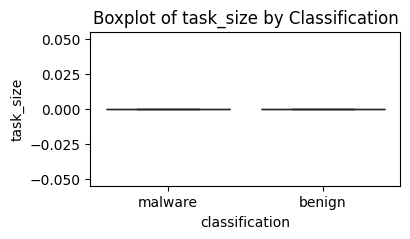

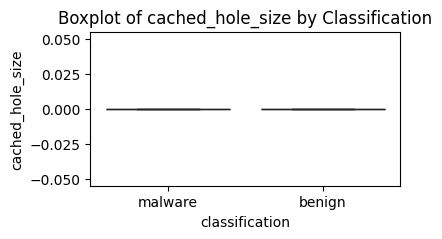

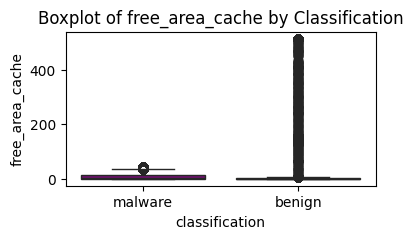

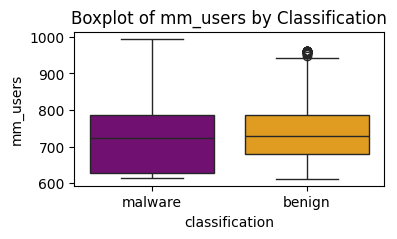

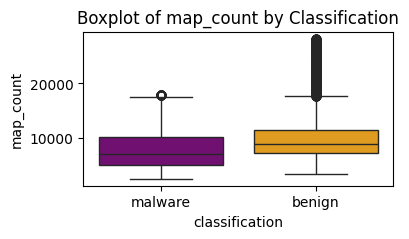

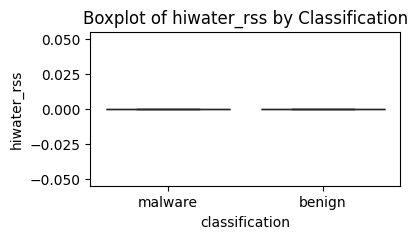

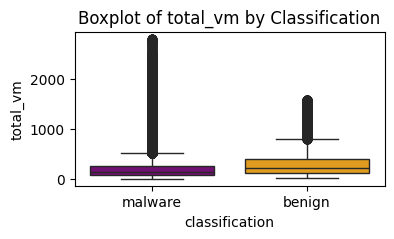

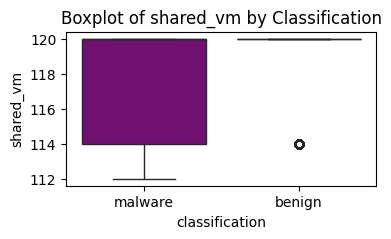

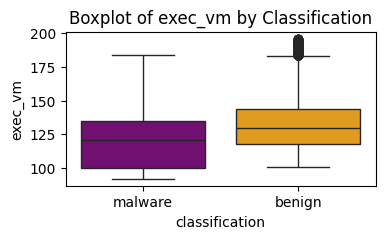

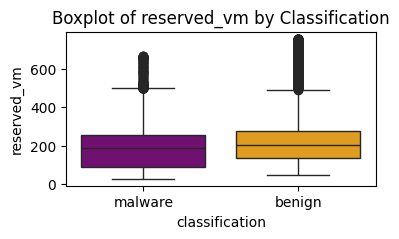

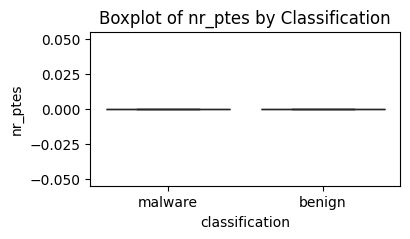

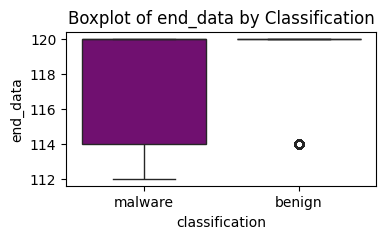

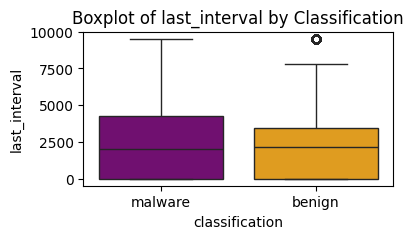

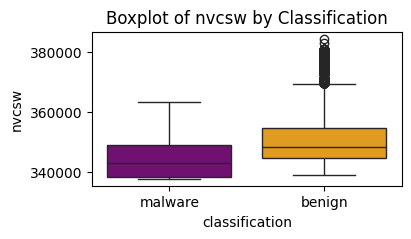

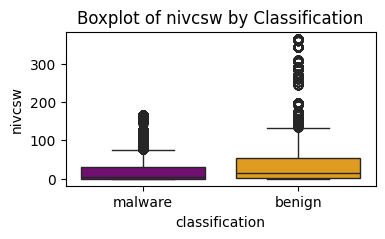

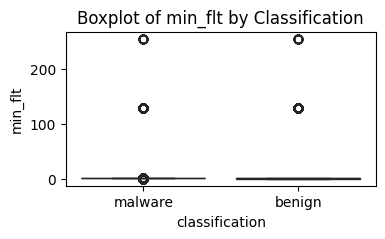

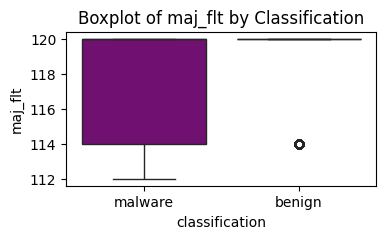

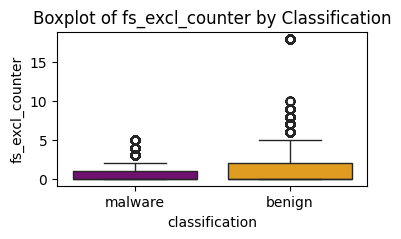

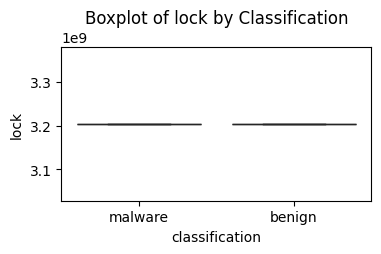

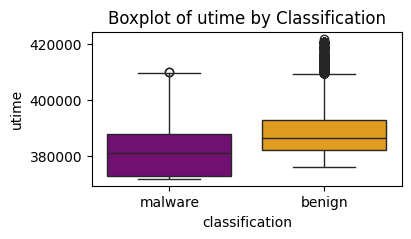

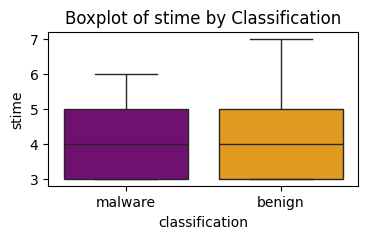

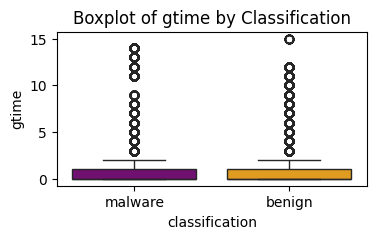

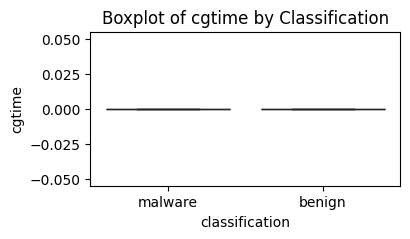

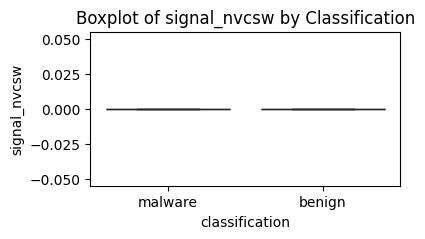

In [95]:
print("\nBox Plots:")
for feature in df.columns:  # Adjust this line according to your actual feature loop
    plt.figure(figsize=(4,2))
    sns.boxplot(x='classification', y=feature, data=df, hue='classification', palette=["#800080", "#FFA500"], legend=False)  # Purple and Orange
    plt.title(f'Boxplot of {feature} by Classification')
    plt.show()

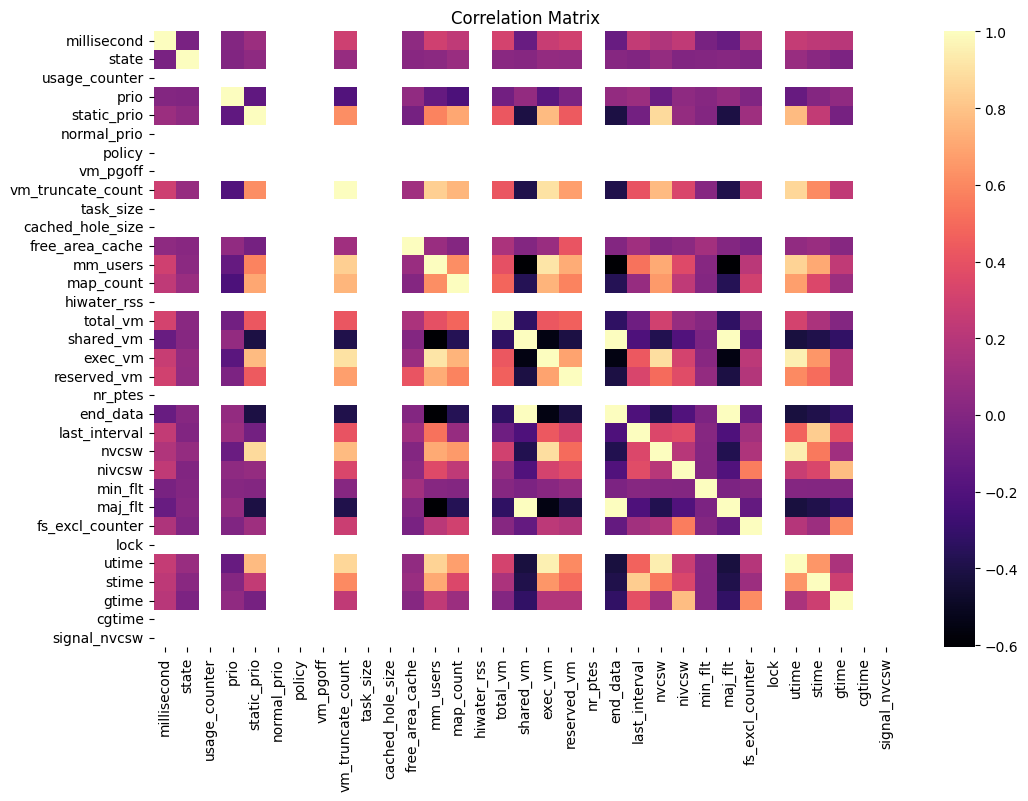

In [31]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='magma', linewidths=0, linecolor=None)
plt.title('Correlation Matrix')
plt.show()

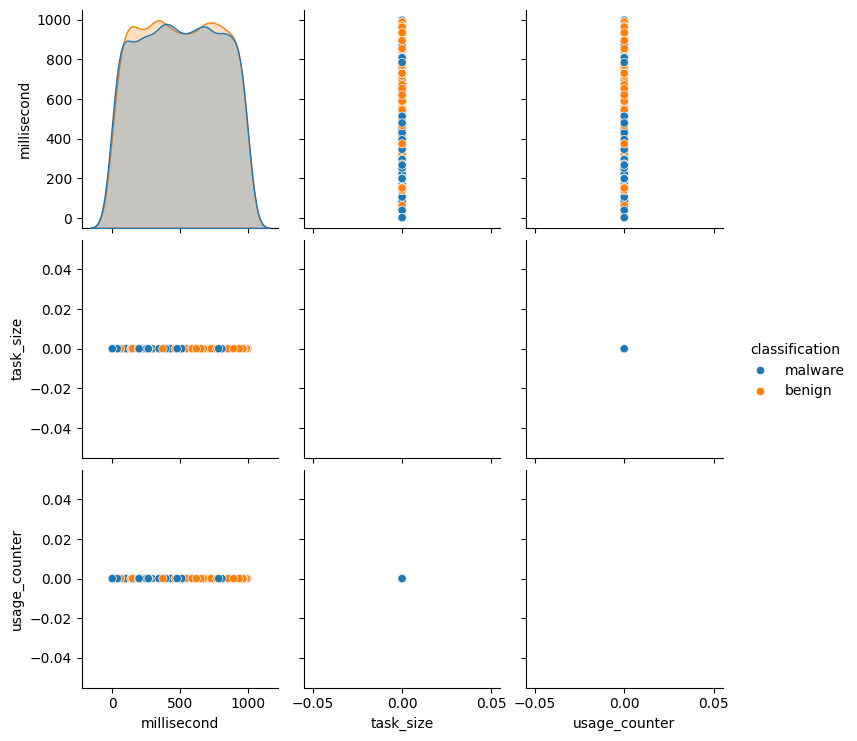

In [35]:
# Select a subset of features
selected_features = ['millisecond', 'task_size', 'usage_counter', 'classification']

# Sample the data
sampled_df = df[selected_features].sample(frac=0.1, random_state=42)

# Generate the pair plot
sns.pairplot(sampled_df, hue='classification')
plt.show()

**MACHINE LEARNING CLASSIFIERS - CREATION, TRAINING, TESTING AND CONFUSION MATRIX**

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# X_train, X_test, y_train, y_test are already defined above

# Step 1: Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Scale only the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])


**Classifier 1 - Logistics Regression**

Logistic Regression
Accuracy: 0.9392
Confusion Matrix:
 [[9239  761]
 [ 455 9545]]
Classification Report:
               precision    recall  f1-score   support

      benign       0.95      0.92      0.94     10000
     malware       0.93      0.95      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

--------------------------------------------------


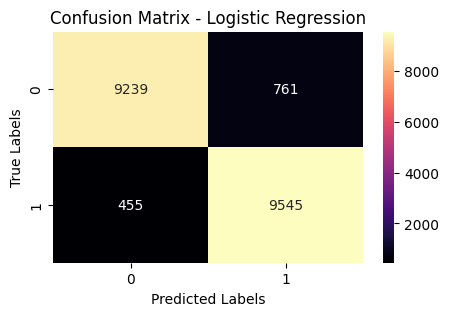

In [87]:
#Create the Model
logistic_regression = LogisticRegression(random_state=0)

# Train the model
logistic_regression.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Logistic Regression
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Display Report
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("-" * 50)

# Create a confusion matrix Plot
cm = confusion_matrix(y_test, y_pred_logistic)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

**Classifier 2 - Decision Tree**

Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[10000     0]
 [    0 10000]]
Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

--------------------------------------------------


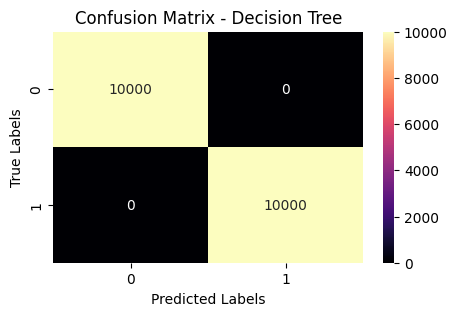

In [88]:
#Create the Model
decision_tree = DecisionTreeClassifier(random_state=0)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Decision Tree
y_pred_dt = decision_tree.predict(X_test_scaled)

# Display Report
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("-" * 50)

# Create a confusion matrix Plot
cm = confusion_matrix(y_test, y_pred_dt)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**Classifier 3 - Support Vector Machine (SVM)**

Support Vector Machine - SVM
Accuracy: 0.9981
Confusion Matrix:
 [[9981   19]
 [  19 9981]]
Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

--------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machine')

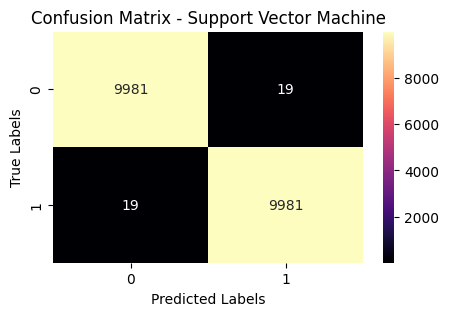

In [89]:
#Create the Model
svm = SVC(random_state=0)

# Train the model
svm.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Support Vector Machine
y_pred_svm = svm.predict(X_test_scaled)

# Display Report
print("Support Vector Machine - SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("-" * 50)

# Create a confusion matrix Plot
cm = confusion_matrix(y_test, y_pred_svm)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machine')



**Classifier 4 - Neural Network (NN)**

Neural Network
Accuracy: 0.99995
Confusion Matrix:
 [[ 9999     1]
 [    0 10000]]
Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

--------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix - Neural Network')

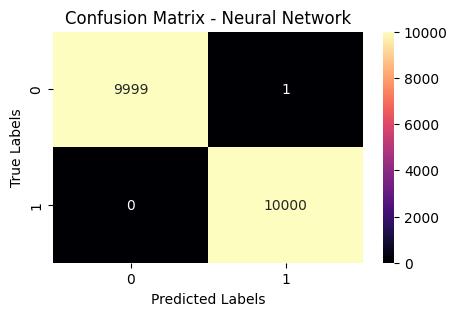

In [90]:
#Create the Model
neural_network = MLPClassifier(random_state=0, max_iter=300)

# Train the model
neural_network.fit(X_train_scaled, y_train)

# Predictions and Evaluation for Neural Network
y_pred_nn = neural_network.predict(X_test_scaled)

# Display Report
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("-" * 50)

# Create a confusion matrix Plot
cm = confusion_matrix(y_test, y_pred_nn)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Neural Network')

**Classifier 5 - K-Nearest Neighbors (KNN)**

K-Nearest Neighbors -KNN
Accuracy: 0.99945
Confusion Matrix:
 [[9995    5]
 [   6 9994]]
Classification Report:
               precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

--------------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix - K-Nearest Neighbors')

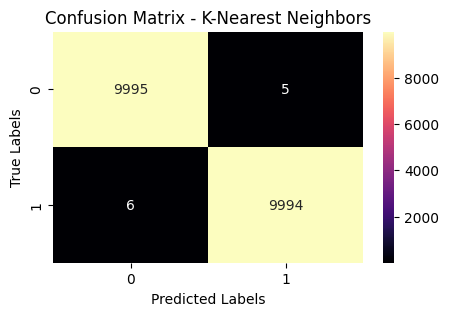

In [92]:
#Create the Model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predictions and Evaluation for K-Nearest Neighbors -KNN
y_pred_knn = knn.predict(X_test_scaled)


# Display Report
print("K-Nearest Neighbors -KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("-" * 50)

# Create a confusion matrix Plot
cm = confusion_matrix(y_test, y_pred_knn)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors')

In [96]:
from google.colab import drive,files


!cp /content/drive/MyDrive/ColabNotebooksPrj/Data1202-GroupProject.ipynb /content/

# Convert the notebook to HTML
!jupyter nbconvert --to html Data1202-GroupProject.ipynb

# Download the HTML file
html_filename = 'Data1202-GroupProject.html'
files.download(html_filename)

[NbConvertApp] Converting notebook Data1202-GroupProject.ipynb to html
[NbConvertApp] Writing 2021280 bytes to Data1202-GroupProject.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>